<a href="https://colab.research.google.com/github/SreeBhagya-S/TKM_21/blob/main/PR_SMS_spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text

     |████████████████████████████████| 4.9 MB 9.8 MB/s 
     |████████████████████████████████| 462 kB 40.7 MB/s 


Dataset Available at: https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/TKM/references for review analysis/datasets/spam2.csv',encoding='cp1252')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [6]:
df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [7]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [8]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [9]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape
df_balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [10]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
2753,ham,Sat right? Okay thanks...,0
1012,ham,"I just got home babe, are you still awake ?",0
1839,spam,Hack Chat. Get backdoor entry into 121 chat ro...,1
2346,ham,"Hi this is yijue, can i meet u at 11 tmr?",0
1521,spam,"URGENT! Your Mobile No was awarded a £2,000 Bo...",1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [12]:
X_train.head(4)

2341    I will take care of financial problem.i will h...
5423                               Sorry, I'll call later
983     Congrats! 2 mobile 3G Videophones R yours. cal...
3260    Congratulations! Thanks to a good friend U hav...
Name: Message, dtype: object

In [13]:
import numpy as np # linear algebra
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tv=TfidfVectorizer(ngram_range=(2,2))
print(tv)
#cv = CountVectorizer(ngram_range=(2,2))
#print(cv)
"""  as we increase the ngram count, 
InTFIDF, there is a large fall in accuracy of  LR classifier and a relatively small change(decrease) in svm also
In CV also the accuracy decreases
TFIDF:::
ngram(1,1)-lr:87%, svm=88%      ngram(2,2)-lr=86.75%,svm=86.5%
ngram(1,10)-lr=82%, svm=86%     ngram(2.10)-lr=81.5%,svm=76.25%
CV:::
ngram(1,1)-lr=88%,svm=83%       ngram(2,2)-lr=83%,svm=81%
ngram(1,10-lr=83.5,svm=74.5)    ngram(2.10)-lr=81%,svm=70%
"""

TfidfVectorizer(ngram_range=(2, 2))


'  as we increase the ngram count, \nInTFIDF, there is a large fall in accuracy of  LR classifier and a relatively small change(decrease) in svm also\nIn CV also the accuracy decreases\nTFIDF:::\nngram(1,1)-lr:87%, svm=88%      ngram(2,2)-lr=86.75%,svm=86.5%\nngram(1,10)-lr=82%, svm=86%     ngram(2.10)-lr=81.5%,svm=76.25%\nCV:::\nngram(1,1)-lr=88%,svm=83%       ngram(2,2)-lr=83%,svm=81%\nngram(1,10-lr=83.5,svm=74.5)    ngram(2.10)-lr=81%,svm=70%\n'

In [14]:
x_train=tv.fit_transform(X_train)
#print(x_train)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=100000)
lr.fit(x_train,y_train)
pred_1=lr.predict(tv.transform(X_test))
#print(pred_1)

from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, pred_1)

In [16]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':y_test,'y_Predicted':pred_1}
dataset = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
conf_matrix = pd.crosstab(dataset['y_Actual'], dataset['y_Predicted'], rownames=['Actual'], colnames=['Predicted'],margins="TRUE")
print(conf_matrix)

Predicted    0    1  All
Actual                  
0          176   11  187
1           26  161  187
All        202  172  374


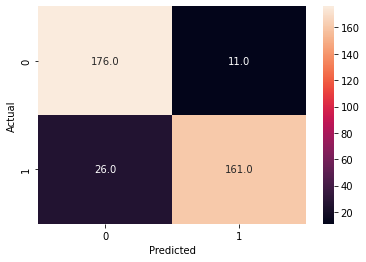


Using Logistic Regression, Accuracy=  0.9010695187165776


In [17]:
data = {'y_Actual':y_test,'y_Predicted':pred_1}
dataset = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
conf_matrix_table = pd.crosstab(dataset['y_Actual'], dataset['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix_table, annot=True,fmt=".1f")
plt.show()

from sklearn.metrics import accuracy_score
score_1=accuracy_score(y_test,pred_1)
print("\nUsing Logistic Regression, Accuracy= ",score_1)

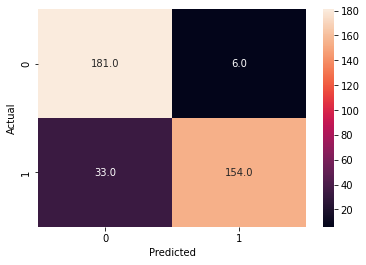


Using SVM, Accuracy=  0.8957219251336899


In [18]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_2=svm.predict(tv.transform(X_test))
score_2=accuracy_score(y_test,pred_2)
data = {'y_Actual':y_test,'y_Predicted':pred_2}
dataset = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
conf_matrix_table = pd.crosstab(dataset['y_Actual'], dataset['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix_table, annot=True,fmt=".1f")
plt.show()
print("\nUsing SVM, Accuracy= ",score_2)

In [19]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 12.5 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 6.5 MB 38.4 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████████████████████| 895 kB 37.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [20]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [21]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [22]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
#model = ClassificationModel('bert', 'bert-base-multilingual-cased', num_labels=5, args={'preprocess_input_data': True, 'overwrite_output_dir': True}) 
# You can set class weights by using the optional weight argument

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [24]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [25]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 44s 664ms/step - loss: 0.6539 - accuracy: 0.6089 - precision: 0.6134 - recall: 0.5893
Epoch 2/10
35/35 [==============================] - 24s 674ms/step - loss: 0.5170 - accuracy: 0.8107 - precision: 0.7900 - recall: 0.8464
Epoch 3/10
35/35 [==============================] - 23s 672ms/step - loss: 0.4474 - accuracy: 0.8446 - precision: 0.8305 - recall: 0.8661
Epoch 4/10
35/35 [==============================] - 24s 673ms/step - loss: 0.4038 - accuracy: 0.8607 - precision: 0.8412 - recall: 0.8893
Epoch 5/10
35/35 [==============================] - 24s 672ms/step - loss: 0.3702 - accuracy: 0.8732 - precision: 0.8579 - recall: 0.8946
Epoch 6/10
35/35 [==============================] - 24s 676ms/step - loss: 0.3581 - accuracy: 0.8759 - precision: 0.8550 - recall: 0.9054
Epoch 7/10
35/35 [==============================] - 24s 675ms/step - loss: 0.3248 - accuracy: 0.8929 - precision: 0.8691 - recall: 0.9250
Epoch 8/10
35/35 [================

In [26]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 9s 653ms/step - loss: 0.2857 - accuracy: 0.9037 - precision: 0.8953 - recall: 0.9144


[0.28571057319641113,
 0.903743326663971,
 0.8952879309654236,
 0.9144384860992432]

In [27]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [28]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[167,  20],
       [ 16, 171]])

Text(33.0, 0.5, 'Truth')

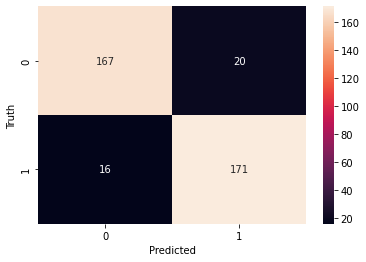

In [30]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       187
           1       0.90      0.91      0.90       187

    accuracy                           0.90       374
   macro avg       0.90      0.90      0.90       374
weighted avg       0.90      0.90      0.90       374



In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=100000)
lr.fit(x_train,y_train)
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
#x_test=["hi how are you","I had originally chosen the Conrad Chicago Hotel for its location near shopping centers that were within walking distance. ","nice food","bad room","what r u speaking"]
pred_1=lr.predict(tv.transform(reviews))
r_predicted = np.where(pred_1> 0.5, 'spam', 'ham')
r_predicted

array(['spam', 'spam', 'spam', 'ham', 'ham'], dtype='<U4')

In [34]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
m=model.predict(reviews)
r_predicted = np.where(m > 0.5, 'spam', 'ham')
r_predicted

array([['spam'],
       ['spam'],
       ['spam'],
       ['ham'],
       ['ham']], dtype='<U4')